In [62]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./stats.csv")

In [63]:
df

,port,duration,pkt_size,rate,mbps,mpps,loss
0,0,60,64,1.0,179.4192,0.3738,0.0000
1,1,60,64,1.0,179.4145,0.3738,0.0026
2,2,60,64,1.0,179.4191,0.3738,0.0000
3,3,60,64,1.0,179.4196,0.3738,0.0000
4,0,60,64,2.0,358.8131,0.7475,0.0079
...,...,...,...,...,...,...,...
671,3,60,1024,75.0,18363.5065,2.2504,0.0797
672,0,60,1024,76.0,12087.1224,1.4813,35.1035
673,1,60,1024,76.0,11777.6354,1.4433,36.7680
674,2,60,1024,76.0,18595.6032,2.2789,0.1254


In [64]:
df['port_pkt_size'] = 'p' + df['port'].map(str) + ' ' + df['pkt_size'].map(str)
# df = df.loc[(df['pkt_size'] == 64) | (df['pkt_size'] == 256) | (df['pkt_size'] == 1024)]
df_intel = df.loc[df['port'] > 1]
df_arm = df.loc[df['port'] < 2]
df = df.loc[df['pkt_size'] != 128]
df

,port,duration,pkt_size,rate,mbps,mpps,loss,port_pkt_size
0,0,60,64,1.0,179.4192,0.3738,0.0000,p0 64
1,1,60,64,1.0,179.4145,0.3738,0.0026,p1 64
2,2,60,64,1.0,179.4191,0.3738,0.0000,p2 64
3,3,60,64,1.0,179.4196,0.3738,0.0000,p3 64
4,0,60,64,2.0,358.8131,0.7475,0.0079,p0 64
...,...,...,...,...,...,...,...,...
671,3,60,1024,75.0,18363.5065,2.2504,0.0797,p3 1024
672,0,60,1024,76.0,12087.1224,1.4813,35.1035,p0 1024
673,1,60,1024,76.0,11777.6354,1.4433,36.7680,p1 1024
674,2,60,1024,76.0,18595.6032,2.2789,0.1254,p2 1024


In [65]:
perf_port = df.pivot_table(index='rate',columns='port_pkt_size',values='mpps')
perf_port

port_pkt_size,p0 1024,p0 256,p0 512,p0 64,p1 1024,p1 256,p1 512,p1 64,p2 1024,p2 256,p2 512,p2 64,p3 1024,p3 256,p3 512,p3 64
rate,,,,,,,,,,,,,,,,
1.0,0.0301,0.1138,0.0590,0.3738,0.0301,0.1138,0.0590,0.3738,0.0301,0.1138,0.0590,0.3738,0.0301,0.1138,0.0590,0.3738
2.0,0.0602,0.2275,0.1180,0.7475,0.0602,0.2275,0.1180,0.7473,0.0602,0.2275,0.1180,0.7476,0.0602,0.2275,0.1180,0.7476
3.0,0.0887,0.3356,0.1771,1.0990,0.0887,0.3356,0.1771,1.0983,0.0887,0.3356,0.1771,1.1025,0.0887,0.3356,0.1771,1.1027
4.0,0.1203,0.4550,0.2361,1.4868,0.1203,0.4550,0.2361,1.4903,0.1203,0.4550,0.2361,1.4948,0.1203,0.4550,0.2361,1.4950
5.0,0.1504,0.5687,0.2902,1.4134,0.1504,0.5687,0.2902,1.3758,0.1504,0.5688,0.2902,1.8637,0.1504,0.5688,0.2902,1.8647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72.0,1.5103,NaN,NaN,NaN,1.5120,NaN,NaN,NaN,2.1609,NaN,NaN,NaN,2.1625,NaN,NaN,NaN
73.0,1.5594,NaN,NaN,NaN,1.5192,NaN,NaN,NaN,2.1909,NaN,NaN,NaN,2.1903,NaN,NaN,NaN
74.0,1.4947,NaN,NaN,NaN,1.4307,NaN,NaN,NaN,2.1824,NaN,NaN,NaN,2.1841,NaN,NaN,NaN


In [66]:
# perf_port = perf_port.fillna(perf_port.mean())
# perf_port

In [67]:
perf_port_intel = df_intel.pivot_table(index='rate',columns='port_pkt_size',values='mpps')
perf_port_arm = df_arm.pivot_table(index='rate',columns='port_pkt_size',values='mpps')

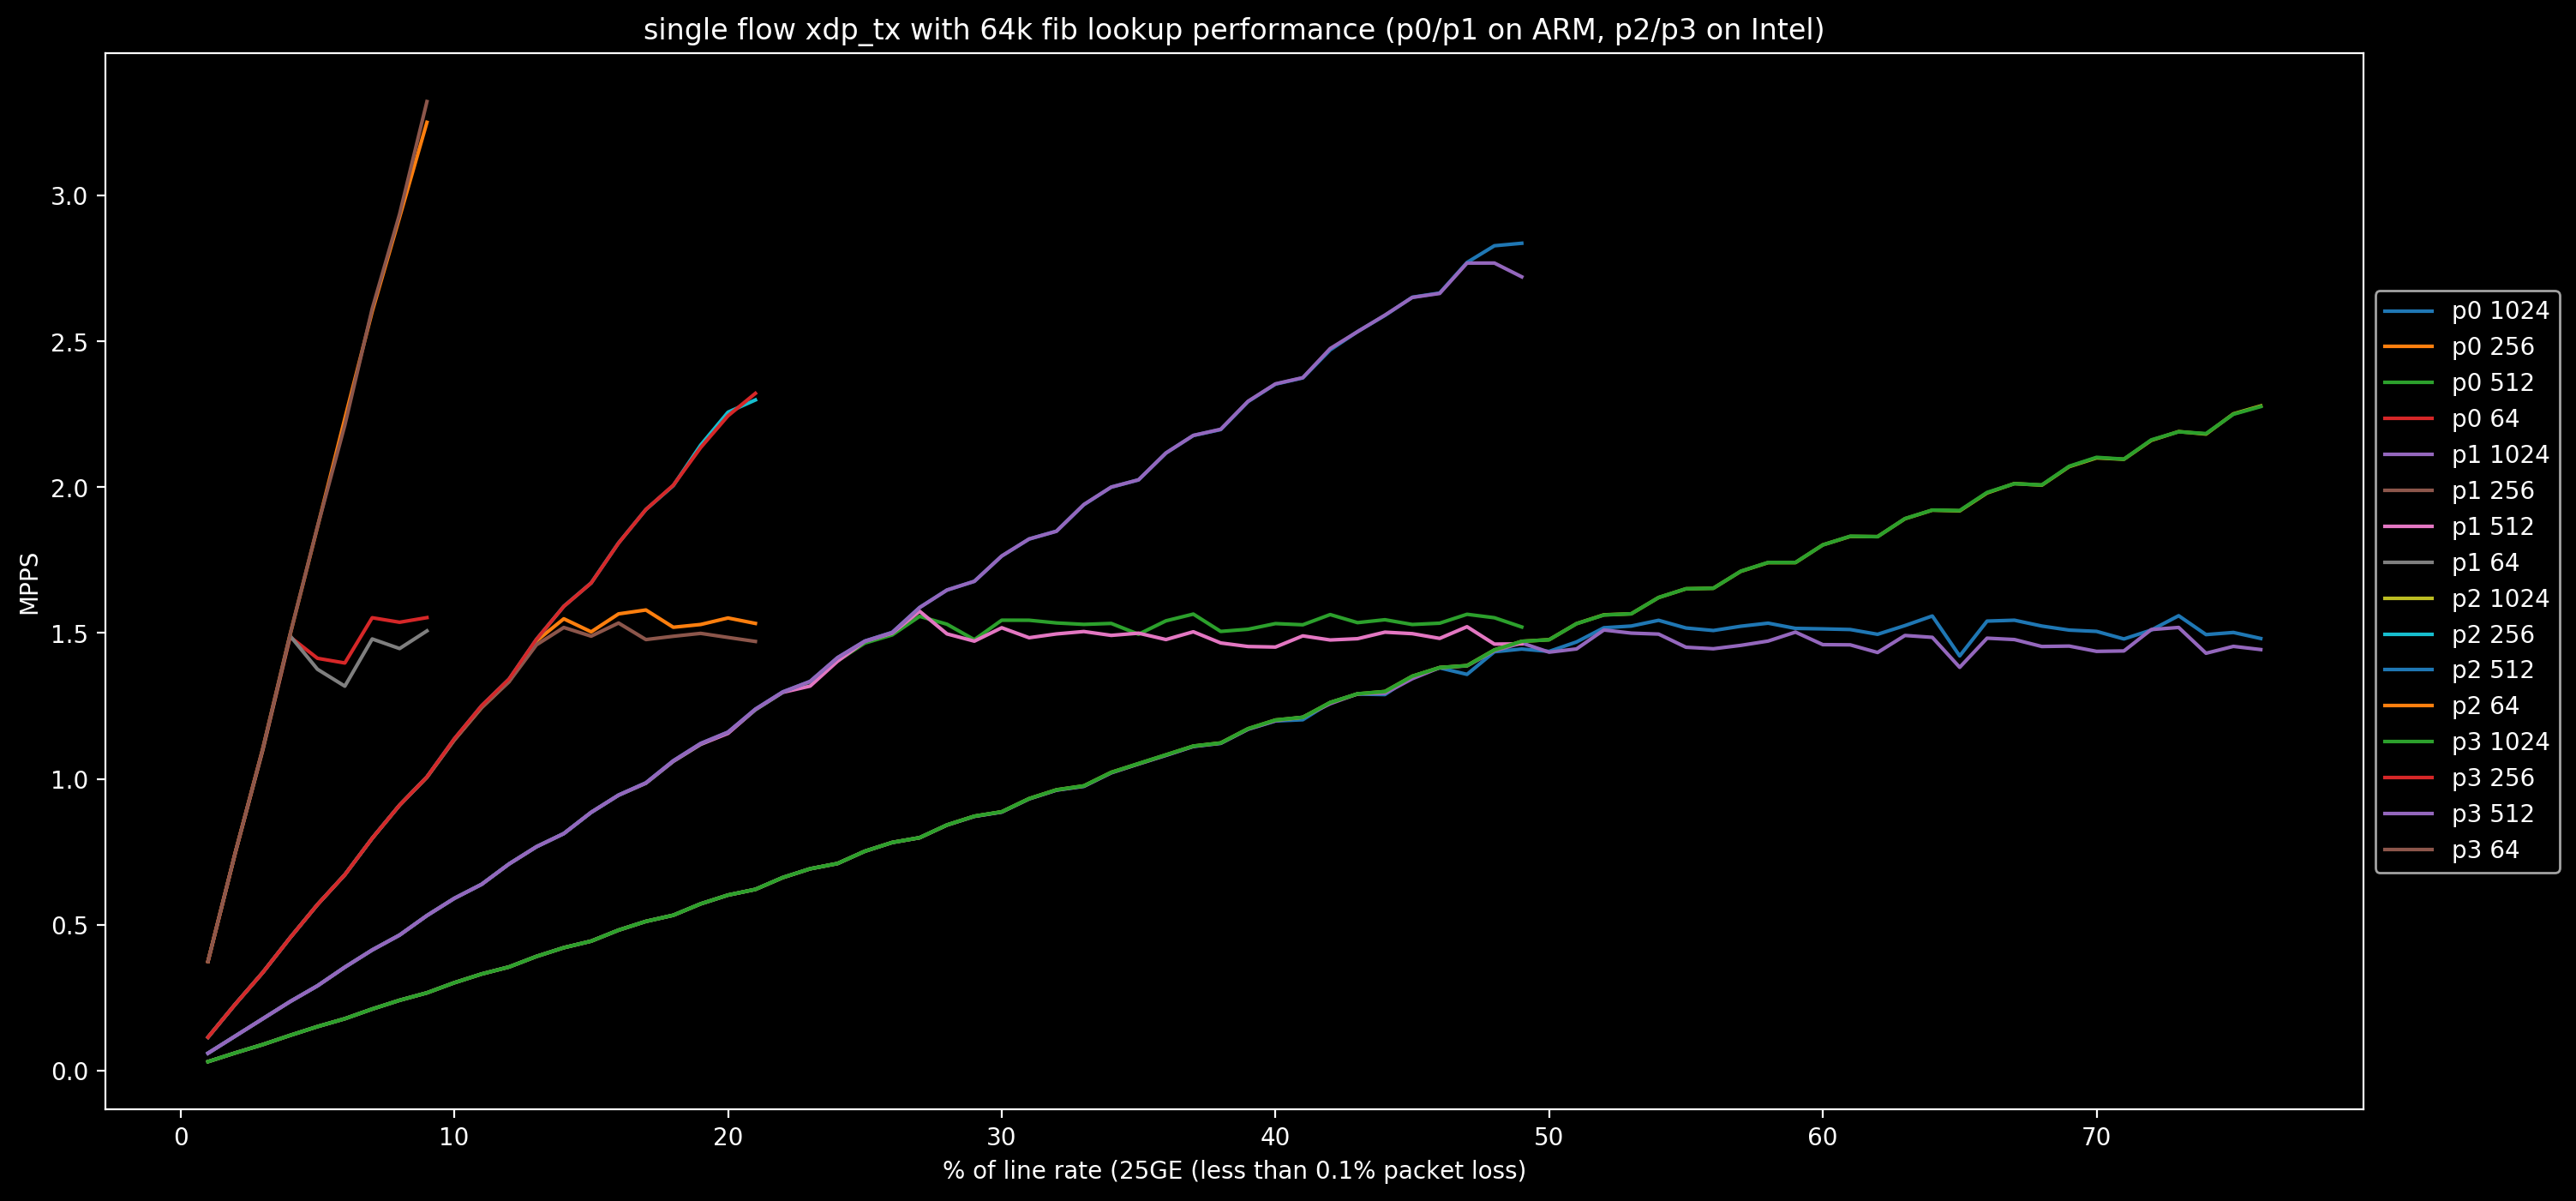

In [68]:
f = plt.figure()
plt.title('single flow xdp_tx with 64k fib lookup performance (p0/p1 on ARM, p2/p3 on Intel)', color='white')
ax = perf_port.plot(subplots=False,figsize=(17,8),ax=f.gca())
ax.set_xlabel("% of line rate (25GE (less than 0.1% packet loss)")
ax.set_ylabel("MPPS")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

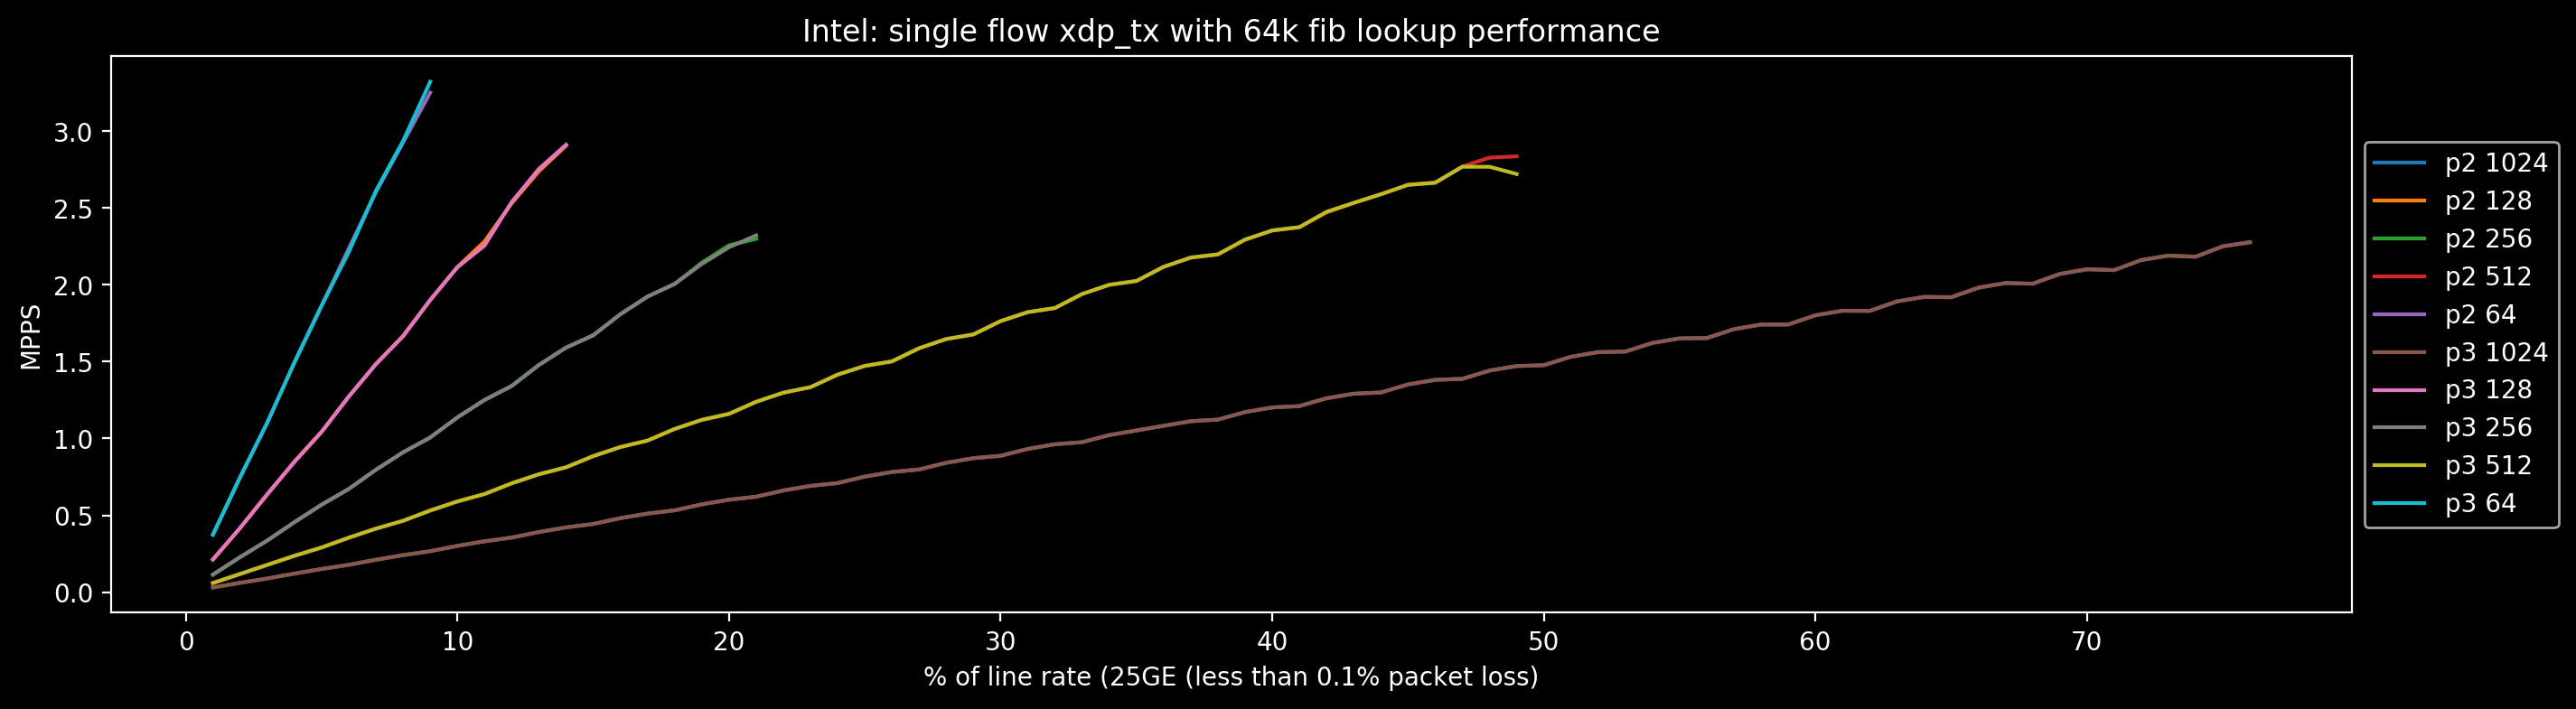

In [69]:
f = plt.figure()
plt.title('Intel: single flow xdp_tx with 64k fib lookup performance', color='white')
ax = perf_port_intel.plot(subplots=False,figsize=(16,4),ax=f.gca())
ax.set_xlabel("% of line rate (25GE (less than 0.1% packet loss)")
ax.set_ylabel("MPPS")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

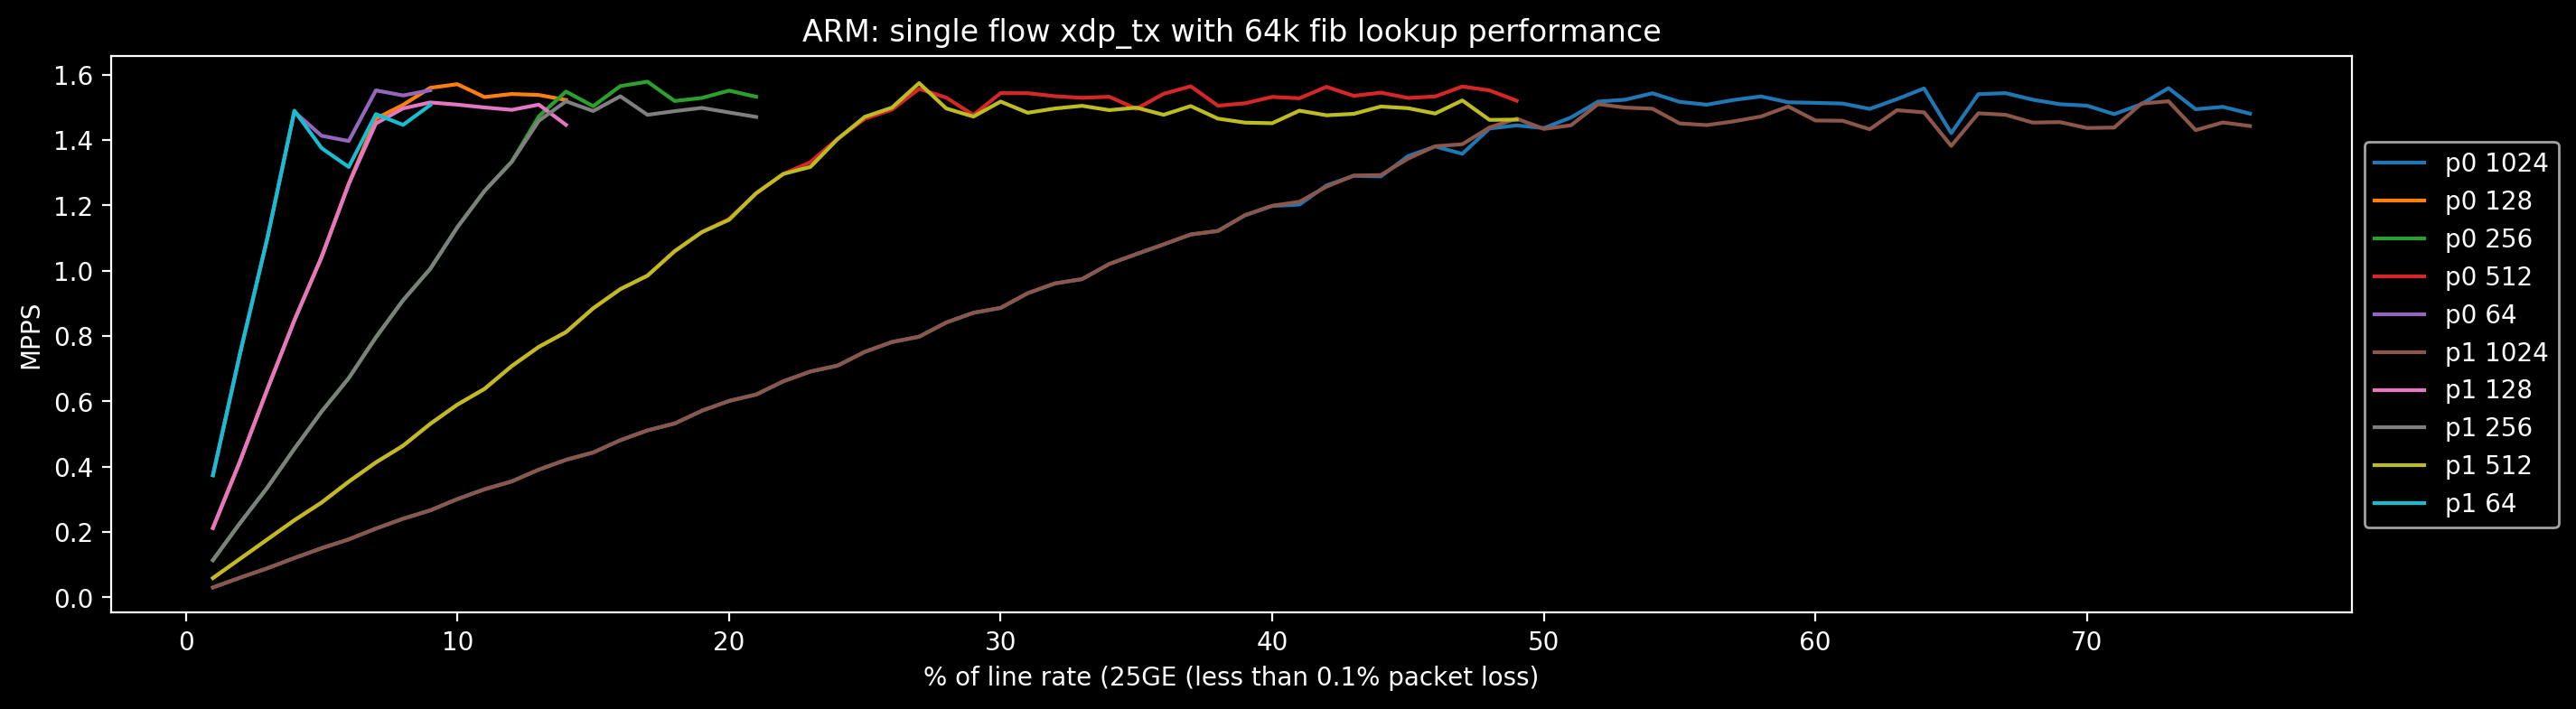

In [70]:
f = plt.figure()
plt.title('ARM: single flow xdp_tx with 64k fib lookup performance', color='white')
ax = perf_port_arm.plot(subplots=False,figsize=(16,4),ax=f.gca())
ax.set_xlabel("% of line rate (25GE (less than 0.1% packet loss)")
ax.set_ylabel("MPPS")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show